<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/RecuperacaoInformacao/blob/main/TrabalhoTrilha6/ExercicioTrilha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [171]:
#Monta-se os dados que queremos verificar em um DataFrame Pandas
texto_verificar = np.array([
                            ("Genero", "App  pioneiro no Nordeste registra episódios de violência contra pessoas LGBTQIA+", "Na segunda-feira (12) em Pernambuco, Micael (nome fictício), jovem, gay e morador de uma cidade do sertão de Pernambuco foi vítima de violência sexual. Como todo cidadão provido de direitos, procurou a delegacia da região de Pernambuco, mas ao contrário dos demais que foram recebidos naquele plantão, ele não teve sua denúncia registrada. O escrivão encheu o rapaz de perguntas, sugerindo que não valeria a pena prestar queixa.Marcado pela violência física e pela negligência praticada por um agente do estado, Micael de PErnambuco só conseguiu protocolar um boletim de ocorrência virtual no dia seguinte, depois que uma amiga entrou em contato com o Movimento LGBT Leões do Norte, no Recife. Um representante da entidade então orientou o jovem a fazer o relato da agressão por meio do aplicativo Rugido.A plataforma lançada no último dia 29 de janeiro em PERnambuco – Dia Nacional da Visibilidade Trans – permite que qualquer pessoa faça uma denúncia de episódios de violação de direitos contra um membro da comunidade LGBTQIA+. O app, que pode ser baixado em aparelhos eletrônicos com sistema android ou acessado no endereço denuncie.rugidolgbtqi.com.br, oferece um formulário simples para o relato da violência.Reprodução da telaCom essa iniciativa pioneira no Nordeste, o usuário precisa apenas fornecer informações como nome completo, nome social, idade, e-mail e telefone para contato. Também é importante informar a identidade de gênero e a orientação sexual, em seguida, se o fato aconteceu ou está acontecendo contra si ou a vítima trata-se de outra pessoa. O caso deve ser relatado com o máximo de detalhes, incluindo nome do local onde ocorreu e o anexo de arquivos de imagem (fotos ou vídeos) se houver.Em menos de 100 dias em funcionamento, foram mais de 100 downloads e até esta quarta-feira (14) o Rugido recebeu 19 denúncias. Além de episódios de LGBTfobia por questões religiosas e de ameaças, a plataforma registrou pedidos de ajuda sobre adoção por parte de casais homoafetivos e também em relação ao serviço público de saúde mental. Em todas as situações o sigilo é garantido.O Rugido é uma ferramenta de exercício da cidadania da população LGBT, que há muito tempo demandava por um serviço que prestasse acolhimento para garantir uma denúncia qualificada, ou seja, com todos os elementos necessários para o registro formal de uma queixa. Nós recebemos esses relatos e fazemos o encaminhamento para o órgão responsável, mas também acompanhamos o desenrolar do processo, explica Marcone Costa, integrante da equipe pedagógica do Leões do Norte.SubnotificaçãoEntre janeiro de 2018 e junho de 2020, a Secretaria de Defesa Social de Pernambuco (SDS) contabilizou 2.871 pessoas LGBTQIA+ vítimas de violência. Segundo o relatório do governo, os delitos mais cometidos contra essa população foram ameaça, lesão corporal, injúria e violência doméstica ou familiar. Todos os 185 municípios do estado, mais Fernando de Noronha, registraram algum tipo de violação, sendo a maioria dos casos dentro da casa da vítima e na via pública.Na avaliação de Costa, a realidade pode ser muito mais assustadora do que os números oficiais revelam, o que torna o app Rugido ainda mais importante para o público LGBTQIA+. Há uma clara subnotificação, ainda mais durante a pandemia. A SDS só contabiliza os casos de violência que geraram boletins de ocorrências, mas, como sabemos, existe um despreparo das delegacias para o acolhimento da pessoa LGBT vítima de violência, o que acaba fazendo com que muitas vítimas sequer procurem a polícia, afirma.O aplicativo Rugido, que conta com o apoio da Rede LGBT do Interior de Pernambuco, da Escola de Formação Quilombo dos Palmares e do Fundo Brasil, também oferece ao usuário um canal de notícias, A professora Layla Pereira Sampaio, 33, engravidou há 9 anos, depois de uma noite com um amigo. Já consciente da sua orientação sexual e tendo após isso apenas relacionamentos com outras mulheres, ela só soube da gestação quando estava no quinto mês, depois de desconfiar do ganho de peso e procurar um ginecologista. Na época, Layla tinha concluído a graduação em matemática e se preparava para a seleção de mestrado fora do Brasil.Embora não estivesse nos meus planos, recebi a notícia da gravidez com tranquilidade. No dia seguinte à confirmação, comuniquei ao meu amigo, agora pai da minha filha Luiza, e de imediato começamos a organizar tudo para a chegada dela, lembra Layla.Desde então, todas as consultas e demais compromissos que envolvam a pequena Luiza, os dois cumprem juntos, tudo é dividido. Com Lulu eu percebo que o preconceito aparece quando eu conto nossa história a quem não nos conhece, aí sempre se referem ao pai dela como meu ex-marido ou ex-namorado, mesmo explicando que sempre fomos amigos, conta.Há quase três anos, Layla começou a namorar a veterinária Isabel Sampaio, 33. Desde o início da relação, Bel, como é chamada, externou seu desejo de ser mãe estando em um relacionamento ou não. Pouco depois de um ano de casadas resolveram fazer uma inseminação caseira a partir do semen de um doador anônimo. A intervenção deu certo e Lília está para chegar em junho.Layla Sampaio é mãe de Luiza de 9 anos e esposa de Isabel Sampaio que está grávida de Lília_ (1)_Para Layla (d), o Dia das Mães tem sido uma data para o consumismo e deveria ser encarado como mais um dia importante de luta. Crédito: Arquivo PessoalSofremos discriminação com três obstetras, ou insistiam na pergunta de quem era o pai, mesmo nós explicando que não tinha pai e sim um doador, ou questionando se eu era a amiga que estava acompanhando Bel e não sua esposa. É diferente do que aconteceu com Luiza, mas a raiz é o mesmo preconceito, afirma Layla.Para a professora, o Dia das Mães já deveria ter sido substituído oficialmente pelo Dia da Família dados sobre homicídios de pessoas LGBTQIA+ e uma lista com endereços e telefones de locais que ofertam serviços gratuitos de saúde e de assistência social."),
                            ("Genero", "Mães lésbicas e trans se impõem contra preconceito", "Neste domingo (9), as redes sociais serão tomadas por fotos, vídeos e hashtags em homenagem a muitas mulheres. Na televisão e no rádio, peças publicitárias vão explorar famílias felizes, na tentativa de vender seus produtos, afinal de contas é Dia das Mães – historicamente a segunda melhor data para o comércio, só perdendo para o Natal.Este será o segundo Dia das Mães em meio à pandemia do coronavírus, então boa parte das mensagens, sobretudo as comerciais, deverão trazer em seu contexto as recomendações sanitárias para prevenir a covid-19. Outra certeza são os formatos de famílias e as figuras maternas que tenderão a ser representados nesses comerciais.O que também ainda é tradição neste domingo é o movimento de invisibilização das mães lésbicas e das mães que são mulheres trans. Umas são críticas à data por ser mais uma oportunidade de exploração do capitalismo, já outras acham importante a comemoração. O que todas elas concordam, é que o Dia das Mães é uma oportunidade para visibilizar todas as configurações familiares e de lutar contra a discriminação.A professora Layla Pereira Sampaio, 33, engravidou há 9 anos, depois de uma noite com um amigo. Já consciente da sua orientação sexual e tendo após isso apenas relacionamentos com outras mulheres, ela só soube da gestação quando estava no quinto mês, depois de desconfiar do ganho de peso e procurar um ginecologista. Na época, Layla tinha concluído a graduação em matemática e se preparava para a seleção de mestrado fora do Brasil.Embora não estivesse nos meus planos, recebi a notícia da gravidez com tranquilidade. No dia seguinte à confirmação, comuniquei ao meu amigo, agora pai da minha filha Luiza, e de imediato começamos a organizar tudo para a chegada dela, lembra Layla.Desde então, todas as consultas e demais compromissos que envolvam a pequena Luiza, os dois cumprem juntos, tudo é dividido. Com Lulu eu percebo que o preconceito aparece quando eu conto nossa história a quem não nos conhece, aí sempre se referem ao pai dela como meu ex-marido ou ex-namorado, mesmo explicando que sempre fomos amigos, conta.Há quase três anos, Layla começou a namorar a veterinária Isabel Sampaio, 33. Desde o início da relação, Bel, como é chamada, externou seu desejo de ser mãe estando em um relacionamento ou não. Pouco depois de um ano de casadas resolveram fazer uma inseminação caseira a partir do semen de um doador anônimo. A intervenção deu certo e Lília está para chegar em junho.Layla Sampaio é mãe de Luiza de 9 anos e esposa de Isabel Sampaio que está grávida de Lília_ (1)_Para Layla (d), o Dia das Mães tem sido uma data para o consumismo e deveria ser encarado como mais um dia importante de luta. Crédito: Arquivo PessoalSofremos discriminação com três obstetras, ou insistiam na pergunta de quem era o pai, mesmo nós explicando que não tinha pai e sim um doador, ou questionando se eu era a amiga que estava acompanhando Bel e não sua esposa. É diferente do que aconteceu com Luiza, mas a raiz é o mesmo preconceito, afirma Layla.Para a professora, o Dia das Mães já deveria ter sido substituído oficialmente pelo Dia da Família. Do jeito que é, para ela, não passa de uma data para o consumismo. Há vários formatos de família, inclusive, sem mãe. Imagine o sofrimento de uma criança na escola, por exemplo, como os filhos do ator Paulo Gustavo? Entendo que esta data precisa ser mais um dia importante de luta, dizReconhecimentoLutar é um dos verbos que fazem parte do vocabulário da líder comunitária, em Garanhuns (PE), Renata Alexsandra Gonçalves de Souza, 44. Infelizmente nasci no corpo errado, afirma a primeira mulher trans da cidade do agreste pernambucano.Antes de completar 18 anos e tomar a decisão de fazer o processo de transição para o gênero que sempre se identificou, Renata foi casada com uma mulher, desde os 14 anos, com quem teve quatro filhos. Por preconceito do meu pai e da minha família tradicional do município, ele colocava na minha cabeça que eu tinha que ser homem, relembra.Por quase 30 anos, Renata viveu se apresentando como era, uma mulher, mas oficialmente nos documentos os dados eram masculinos. A retificação dos registros oficiais é mais um dos problemas enfrentados por pessoas trans e que muitas vezes serve de instrumento para a discriminação.Renata Alexsandra Gonçalves de Souza, mulher trans mãe de quatro filhos_Renata diz que ser mãe independe do sexo biológico: é muito forte, não é pra qualquer uma. Crédito: Arquivo PessoalRenata é chamada de pai pelos dois casais que são seus filhos e têm entre 24 e 28 anos. Além deles, ela já é avó de seis crianças.O Dia das Mães é uma data muito importante para nós mulheres trans e para todas as outras mulheres que também são mães. Ser mãe é algo muito forte, não é para qualquer uma e isso não depende do sexo biológico. É também uma data de reconhecimento para todas nós que assumimos a maternidade, declara.Espaço e visibilidadeÉ numa casa, na cidade de Salgueiro, sertão de Pernambuco, que o Dia das Mães também ganha o sentido de resistência. A autônoma Adriana Gomes da Silva, 38, nunca pensou em gerar uma criança, mas sonhava em ser mãe por adoção. Quis o destino que ela não tivesse um, mas quatro filhos.Adriana foi casada por 17 anos com outra mulher com quem criou o filho Davi, adotado de uma família do mesmo município. O casal participou de todo processo gestacional, consultas de pré-natal, compra de enxoval, preparação de quarto e até levou a mãe biológica à maternidade.Costumo dizer que Daniel é um presente de Deus. Aqui, por ser interior, é muito mais complicado para a pessoa homossexual assumir, não sofremos violência física, mas já fomos vítimas de muito preconceito. Uma vez na escola, um colega disse que ao meu filho que era para ele se afastar porque ele tinha duas mães. Conversamos com a professora e a família do menino e resolvemos a questão, hoje temos uma boa relação. Mas sabemos que nem sempre é assim, conta.Adriana Gomes da Silva e a esposa CristianeCristiane e Adriana estão casadas há 5 anos e juntaram os quatro filhos. Crédito: Arquivo PessoalAdriana ficou viúva e casou novamente há cinco anos com Cristiane, que já tinha três filhos, hoje com 18, 21 e 23 anos. Não vemos a mídia mostrar família como a nossa e é importante que a gente apareça também no Dia das Mães porque as pessoas ainda julgam muito quem é homossexual. A partir do momento que as pessoas passam a conhecer, entender, acaba o preconceito. Aqui conquistamos o nosso espaço e podemos andar pela rua de mãos dadas, mas sei que na maioria dos lugares não, por isso é muito importante essa visibilidade, explica."),
                            ("Esporte", "Wolff afirma que Mercedes F1 continuará experimentos no carro no GP do Canadá", "A Mercedes espera ter uma ideia melhor de qual é a melhor solução para os problemas do carro após o GP do Canadá da próxima semana. A equipe está usando os fins de semana como oportunidades para reunir informações sobre seu carro, a fim de resolver os problemas que têm sofrido desde o início da temporada.O chefe da equipe, Toto Wolff, admitiu que a falta de oportunidades para realizar testes na temporada. Imagino que se tivéssemos um dia ou dois de testes, daríamos um grande passo. Mas é o que é, essa é a restrição para todos, disse ele.A Mercedes está usando os fins de semana de corrida para realizar experimentos com diferentes peças e configurações. Essa abordagem continuará quando a F1 for ao Canadá na próxima semana. Acho que precisamos abordar os fins de semana de corrida mais de um lado experimental.No momento, não estamos em busca de uma vitória por mérito. Acho que estamos bem atrás das principais equipes. Só precisamos ver essas sessões, talvez não com o objetivo de otimizar a sessão única, mas com o objetivo de entender. É isso que estamos fazendo e é isso que vamos fazer amanhã e em Montreal, afirmou Wolff.A equipe começou a lidar com seu problema na Espanha, mas são necessários mais ganhos. Demos um passo muito bom em Barcelona. Para um circuito com superfície lisa, menos solavancos, estamos bem, acho que temos um bom carro e conseguimos desbloquear o desempenho na corrida, mas na qualificação faltou um pouco.Isso significa, de certa forma, que Montreal é uma corrida muito boa para nós na próxima semana. Porque é saltitante, Montreal é alta e depois da corrida espero ter uma visão melhor, explicou o chefe da Mercedes.")
])
df_ver = pd.DataFrame(data=texto_verificar, columns=["tema", 'titulo', "conteudo"])
df_ver.head()

,tema,titulo,conteudo
0,Genero,App pioneiro no Nordeste registra episódios d...,"Na segunda-feira (12) em Pernambuco, Micael (n..."
1,Genero,Mães lésbicas e trans se impõem contra preconc...,"Neste domingo (9), as redes sociais serão toma..."
2,Esporte,Wolff afirma que Mercedes F1 continuará experi...,A Mercedes espera ter uma ideia melhor de qual...


## Carregando artigos

      tema                                             titulo  \
0   Genero  Falta de recursos para políticas LGBTQIA+ expõ...   
1   Genero  Com políticas públicas esvaziadas, PE enfrenta...   
2   Genero  Judiciário tem sido o grande parceiro das mulh...   
3   Genero  Coordenadora cultural de Igarassu acusa pastor...   
4   Genero                   Elas estão vivas, porém exaustas   
5   Genero                          Aqui, todo mundo é rainha   
6   Genero                       Palloma e o caminho da festa   
7   Genero                Quando Jhonatan deixou Manu brilhar   
8   Genero                             Um São João drag queen   
9   Genero  Protesto contra transfobia marca Dia do Orgulh...   
10  Genero  Torcedores LGBTQIA+ fortalecem a luta contra a...   
11  Genero  Violência contra pessoas LGBTQIA+ dispara em P...   

                                             conteudo  
0   Julian Olimpio, 23 anos, é um homem trans não-...  
1   Entre 2018 e 2020, Pernambuco registro

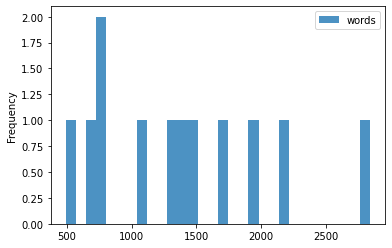

In [158]:
#Carrega o texto em um DataFrame PAndas
df_gen = pd.read_json("BaseDadosTrilha6.json")
print(df_gen)

#Faz a contagem de palavras por cada linha do artigo
df_gen['words'] = df_gen['conteudo'].str.split().str.len()

#Elimina qualquer artigo que tenha gerado menos de 100 palavras
df_gen = df_gen.loc[(df_gen['words'] > 100)]

#Plota o DataFrame em histograma para uma avaliação
df_gen.plot.hist(bins=30, alpha=0.8)



## mesmo tratmento da trilha anterior de limpeza do texto

### Limpeza

In [159]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [160]:
# remoção de palavras de parada
df_gen['content_treated'] = df_gen['conteudo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_ver['content_treated'] = df_ver['conteudo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
df_gen['content_treated'] = df_gen['content_treated'].str.lower().apply(lambda x: unidecode(x))
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_gen['content_treated'] = df_gen['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_gen['content_treated'] = df_gen['content_treated'].str.replace('[{}]'.format(string.digits), '')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_gen['content_treated'] = df_gen['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df_ver['content_treated'] = df_ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20faf0c4d0>,
      dtype=object)

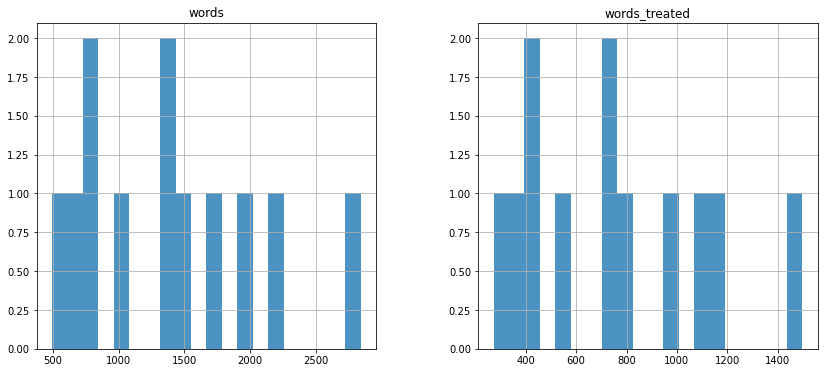

In [161]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_gen['words_treated'] = df_gen['content_treated'].str.split().str.len()
#df_gen.plot();
df_gen.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_gen.sample(10)

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#Genero
XGEN = vectorizer.fit_transform(df_gen['content_treated'])
vocabulary_gen = vectorizer.get_feature_names()
pdXGEN = pd.DataFrame(data=XGEN.toarray(), columns=vocabulary_gen) #.iloc[:,0::2]

#Genero - Verificar
XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]
print(pdXVER)

   abordagem  abordar  acaba  acessado  acham  acho  acolhimento  \
0          0        0      1         1      0     0            2   
1          0        0      1         0      1     0            0   
2          1        1      0         0      0     3            0   

   acompanhamos  acompanhando  acontecendo  ...  visibilidade  visibilidadee  \
0             1             1            1  ...             1              0   
1             0             1            0  ...             1              1   
2             0             0            0  ...             0              0   

   visibilizar  vitima  vitimas  vitoria  viuva  viveu  vocabulario  wolff  
0            0       4        2        0      0      0            0      0  
1            1       0        1        0      1      1            1      0  
2            0       0        0        1      0      0            0      2  

[3 rows x 701 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [163]:
print(vocabulary_gen)

['abandonar', 'aberracao', 'aberta', 'aberto', 'abertura', 'abre', 'abrigamento', 'abrigo', 'absolutos', 'abusadoras', 'abusadores', 'abuso', 'acaba', 'acabar', 'acao', 'acaso', 'aceita', 'aceitacao', 'aceitar', 'aceitava', 'aceitavam', 'aceito', 'aceitos', 'aceitou', 'acenam', 'acenderam', 'acentuou', 'acervo', 'acessados', 'acessar', 'acesso', 'acessorios', 'acham', 'achei', 'acho', 'acima', 'aciona', 'acionaria', 'acoes', 'acolhe', 'acolhedor', 'acolhida', 'acolhidas', 'acolhimento', 'acompanhada', 'acompanhado', 'acompanhamento', 'acompanhando', 'acompanhar', 'acompanhava', 'acompanhe', 'acontece', 'acontecendo', 'acontecer', 'aconteceu', 'acontecido', 'acordo', 'acredita', 'acredito', 'acusacoes', 'acusada', 'adaptar', 'adepta', 'adequacao', 'adequado', 'adianta', 'administracao', 'administrada', 'administrativo', 'administrativos', 'adoecendo', 'adoecido', 'adolescente', 'adolescentes', 'adotadas', 'advogadas', 'advogado', 'advogados', 'afastariam', 'afeminado', 'aferida', 'afeto

In [164]:
len(vocabulary_gen)
df_XGEN = pdXGEN.T
df_XGEN['total_gen'] = df_XGEN.sum(axis=1) 

pdXGEN



,abandonar,aberracao,aberta,aberto,abertura,abre,abrigamento,abrigo,absolutos,abusadoras,...,yane,yao,youtube,youtuber,youtubers,yves,zabumba,zerado,zero,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,3,2,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,2,0
5,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [165]:
# Genero
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XGEN = pdXGEN.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_XGEN['total_gen'] = df_XGEN.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XGEN.drop(df_XGEN.columns[0:len(df_gen['conteudo'])], axis=1, inplace=True)

#Ordena o resultado final
df_XGEN = df_XGEN.sort_values(by='total_gen', ascending=False)

#Gera a tabela
df_XGEN.head(30)

,total_gen
pessoas,81
trans,78
populacao,60
anos,57
pernambuco,53
violencia,52
gente,51
lgbtqia,49
contra,43
ser,39


,0,1,2,3,4,5,6,7,8,9,10,11,present,not_present
pessoas,5,12,13,6,22,3,0,5,3,3,2,7,0.833333,0.083333
trans,1,7,20,8,26,1,1,3,2,9,0,0,0.750000,0.166667
populacao,12,10,6,3,5,0,1,0,0,12,0,11,0.583333,0.333333
anos,5,7,7,4,14,2,3,3,1,2,6,3,0.916667,0.000000
pernambuco,9,9,1,3,4,3,1,2,1,10,2,8,0.916667,0.000000
violencia,4,5,8,4,10,2,0,0,0,8,0,11,0.583333,0.333333
gente,0,8,3,2,33,1,1,0,0,0,3,0,0.500000,0.416667
lgbtqia,12,0,1,2,0,3,1,2,0,10,6,12,0.666667,0.250000
contra,4,3,3,7,5,1,0,0,1,8,2,9,0.750000,0.166667
estado,6,10,2,7,5,1,0,0,0,3,0,5,0.583333,0.333333


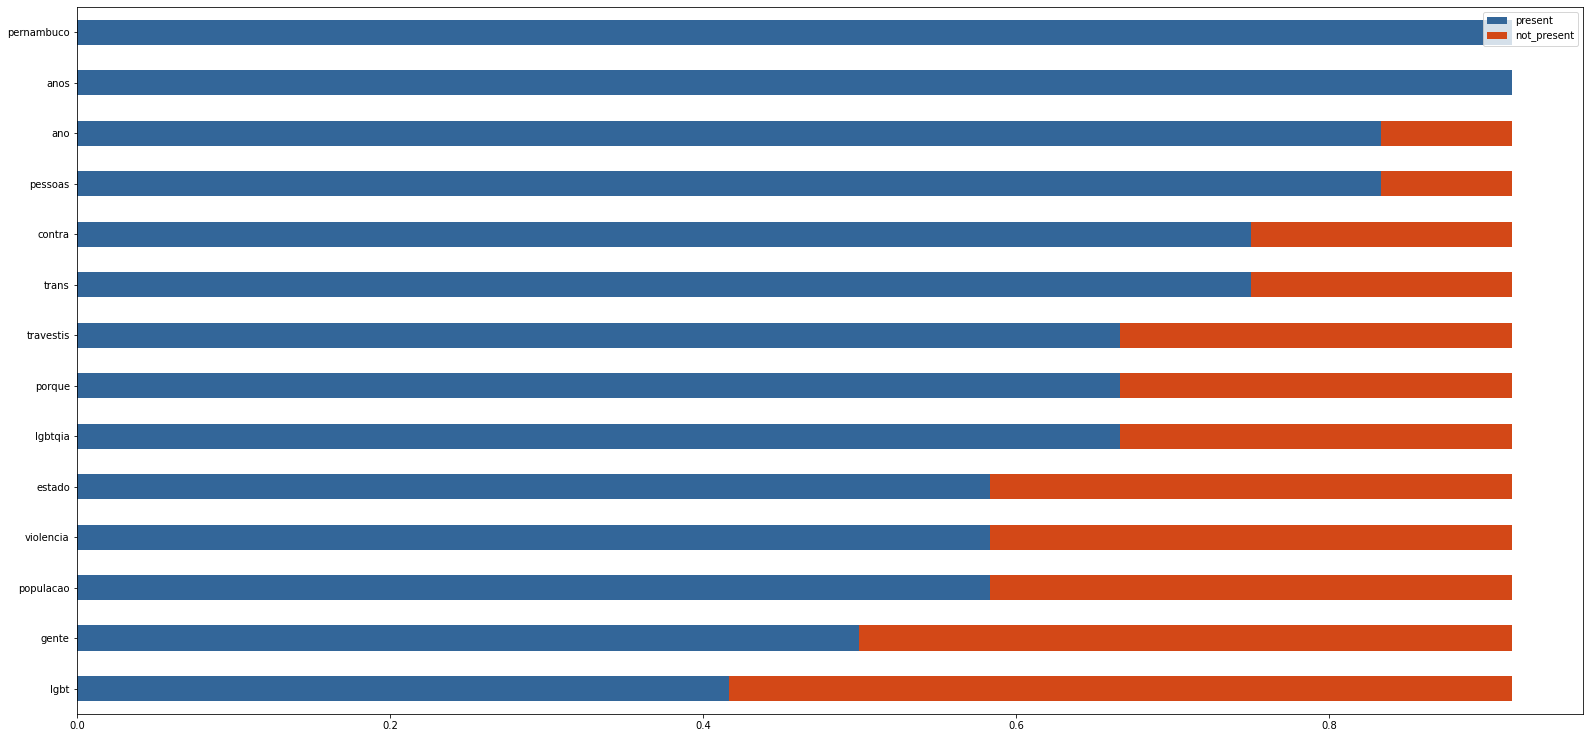

In [166]:
# Genero
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
#pdXGENT = pdXGEN.T
pdXGENT = pdXGEN[['pessoas', 'trans', 'populacao', 'anos', 'pernambuco', 'violencia', 'gente', 'lgbtqia', 'contra', 'estado', 'porque', 'lgbt', 'ano', 'travestis']].T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXGENT['present'] = (pdXGENT.ne(0).sum(axis=1) -1) / len(df_gen['conteudo'])
pdXGENT['not_present'] = pdXGENT.eq(0).sum(axis=1) / len(df_gen['conteudo'])
display(pdXGENT)
#REmove as colunas individuais de cada documento para gerar o grafico
pdXGENT.drop(pdXGENT.columns[0:len(df_gen['conteudo'])], axis=1, inplace=True)

#Ordena o resultado final
pdXGENT = pdXGENT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXGENT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [167]:
n_words = 30
pdXGENT.tail(n_words)

,present,not_present
lgbt,0.416667,0.500000
gente,0.500000,0.416667
populacao,0.583333,0.333333
violencia,0.583333,0.333333
estado,0.583333,0.333333
lgbtqia,0.666667,0.250000
porque,0.666667,0.250000
travestis,0.666667,0.250000
trans,0.750000,0.166667
contra,0.750000,0.166667


,anos,pernambuco,ser,ano,pessoas,ainda,credito,mulher,todos,sobre,...,mulheres,fazer,diz,lgbtqia,pandemia,assim,travestis,desde,crianca,present
0,5,9,6,4,5,2,1,0,1,0,...,0,0,5,12,2,1,2,1,1,0.866667
1,7,9,8,3,12,2,3,3,1,4,...,5,2,1,0,0,1,6,5,1,0.933333
2,7,1,1,2,13,3,0,2,2,4,...,5,2,0,1,1,1,4,4,2,0.800000
3,4,3,1,3,6,1,1,7,1,4,...,2,1,5,2,2,0,5,1,0,0.900000
4,14,4,8,2,22,8,4,2,0,4,...,3,3,1,0,0,4,9,3,1,0.866667
5,2,3,2,1,3,1,2,4,4,3,...,10,2,0,3,2,1,1,0,3,0.866667
6,3,1,1,5,0,2,1,1,2,2,...,1,1,0,1,1,2,0,2,2,0.700000
7,3,2,2,0,5,2,1,3,1,0,...,0,0,1,2,2,2,1,2,1,0.733333
8,1,1,1,2,3,0,1,0,4,3,...,1,0,1,0,0,0,1,0,0,0.600000
9,2,10,4,3,3,2,1,8,0,1,...,3,2,2,10,1,0,6,1,1,0.900000


,present
0,0.866667
1,0.933333
2,0.800000
3,0.900000
4,0.866667
5,0.866667
6,0.700000
7,0.733333
8,0.600000
9,0.900000


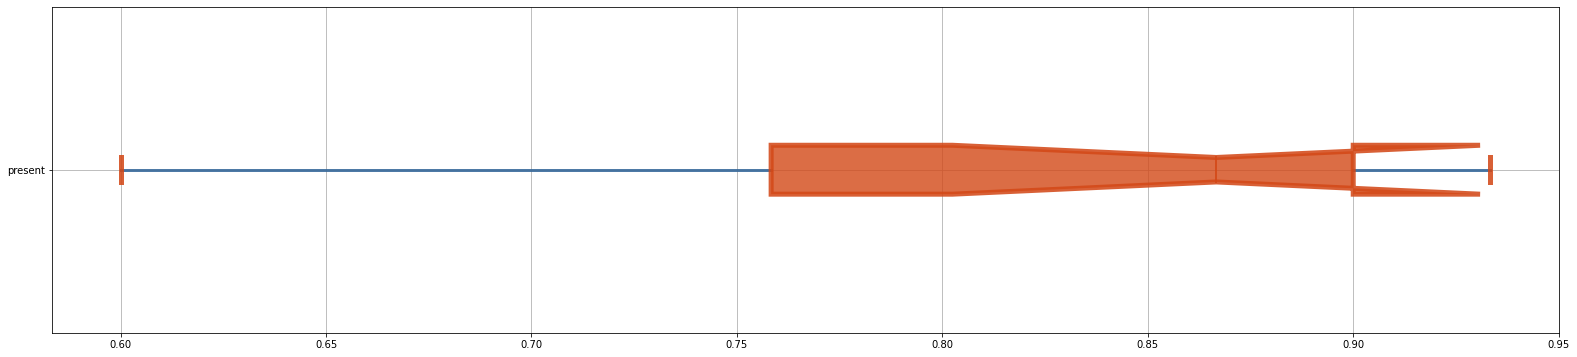

In [168]:
#Reinicia a matriz transposta
pdXGENT = pdXGEN.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXGENT['present'] = (pdXGENT.ne(0).sum(axis=1) -1) / len(df_gen['conteudo'])
pdXGENT = pdXGENT.sort_values(by='present', ascending=False)
pdXGENT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXGENT.head(n_words).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXGENT = pdXGENT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXGENT['present'] = (pdXGENT.ne(0).sum(axis=1)) / n_words
display(pdXGENT)

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXGENT.drop(pdXGENT.columns[0:n_words], axis=1, inplace=True)
display(pdXGENT)
#Gera o gráfico de boxplor 
pdXGENT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)


In [169]:
# Genero
#Reinicia a matriz
pdXGENT = pdXGEN.T

#Mantem o percentual de frequencia de uso para comparação
pdXGENT['present'] = (pdXGENT.ne(0).sum(axis=1) -1) / len(df_gen['conteudo'])

#Ordena
pdXGENT = pdXGENT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXGENT = pdXGENT.head(n_words)

#mantem 15 textos aleatorios para comparar com os demais exemplos
sample_drop =  random.sample(range(0, len(df_gen['conteudo'])), len(df_gen['conteudo']) -0)
pdXGENT.drop(columns=sample_drop, axis=1, inplace=True)
pdXGENT.drop(columns='present', axis=1, inplace=True)

# Apaga todas as colunas, pois so queremos manter o indice para avaliar os demais textos
pdXGENT.drop(pdXGENT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Palavra para os 3 textos que se deseja avaliar
# a se esta relacionado ao tema de genero. 
pdXVERT = pdXVER.T.rename(columns={0: "Texto 1", 1: "Texto 2", 2:"Texto 3"})

In [170]:
pd_comp = pd.merge(left=pdXGENT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / n_words
pd_compT.drop(pd_compT.columns[0:30], axis=1, inplace=True)
pd_compT.T.round(2)

,Texto 1,Texto 2,Texto 3
most_commons,0.73,0.77,0.17
